In [1]:
# Dependencies and Setup
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats

# Study data files
UE_data_path = "../Data/Unemployment_rates_states_5yrs_Clean.csv"

# Read the Unemployment Data 
UE_data_path = pd.read_csv(UE_data_path)
UE_data_path.head()

,State,1/1/2015,2/1/2015,3/1/2015,4/1/2015,5/1/2015,6/1/2015,7/1/2015,8/1/2015,9/1/2015,...,12/1/2019,1/1/2020,2/1/2020,3/1/2020,4/1/2020,5/1/2020,6/1/2020,7/1/2020,8/1/2020,9/20/2020
0,Alabama,6.0,6.0,6.1,6.1,6.2,6.2,6.2,6.1,6.1,...,2.7,2.7,2.7,3,13.8,9.6,7.6,7.9,5.6,6.6
1,Alaska,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,...,6.1,6.0,5.8,5.2,13.5,12.7,12.4,11.6,7.4,7.2
2,Arizona,6.4,6.3,6.3,6.2,6.1,6.1,6.0,6.0,5.9,...,4.5,4.5,4.5,6.1,13.4,9.0,10.0,10.7,5.9,6.7
3,Arkansas,5.6,5.5,5.5,5.4,5.3,5.1,5.0,4.8,4.7,...,3.5,3.5,3.5,5,10.8,9.6,8.1,7.1,7.4,7.3
4,California,6.8,6.7,6.6,6.5,6.4,6.2,6.1,6.0,5.9,...,3.9,3.9,3.9,5.5,16.4,16.4,14.9,13.5,11.2,11.0


In [2]:
print ("data-frame shape: ", UE_data_path.shape)

data-frame shape:  (52, 70)


In [3]:
col = []
for x in UE_data_path.columns:
    if x != "State":
        col.append(x)

In [4]:
# col

In [5]:
d = []
for i, row in UE_data_path.iterrows():
    state = row["State"]
    for x in col:
        dat = x.split("/")
        a ={
            "State":state,
            "Date": f"{dat[0].rjust(2, '0')}-{dat[1].rjust(2, '0')}-{dat[2]}",
            "Year": dat[2],
            "Month": dat[0],
            "Unemployment Rate":row[x]
        }
        d.append(a)

In [6]:
new_df = pd.DataFrame(d)
new_df.head()

,State,Date,Year,Month,Unemployment Rate
0,Alabama,01-01-2015,2015,1,6
1,Alabama,02-01-2015,2015,2,6
2,Alabama,03-01-2015,2015,3,6.1
3,Alabama,04-01-2015,2015,4,6.1
4,Alabama,05-01-2015,2015,5,6.2


In [7]:
new_df["Date"]

0       01-01-2015
1       02-01-2015
2       03-01-2015
3       04-01-2015
4       05-01-2015
           ...    
3583    05-01-2020
3584    06-01-2020
3585    07-01-2020
3586    08-01-2020
3587    09-20-2020
Name: Date, Length: 3588, dtype: object

In [8]:
print ("column names: ", new_df.columns.values)

column names:  ['State' 'Date' 'Year' 'Month' 'Unemployment Rate']


In [9]:
print ("total null values: ", UE_data_path.isna().sum().sum())

total null values:  0


Alicia's Work


* Real Estate Price 




In [10]:
# Extracting the path
real_estate_path = "../Data/Zillow_AllHomes_5yrs_Clean.csv"

In [11]:
# Read Real Estate Data from Zillow 
real_estate_data = pd.read_csv(real_estate_path)
real_estate_data.head()

# original dataframe has 914 rows × 75 columns

,RegionName,StateName,SizeRank,RegionID,RegionType,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,...,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020
0,United States,NaN,0,102001,Country,190722.0,191467.0,192335.0,193235.0,194147.0,...,248440,249439,250595,251849,253057,254320,255845,257804,260091,262604
1,"New York, NY",NY,1,394913,Msa,408905.0,410065.0,410802.0,411779.0,412581.0,...,483191,484139,485177,486507,488000,489895,492468,495908,500412,505569
2,"Los Angeles-Long Beach-Anaheim, CA",CA,2,753899,Msa,526530.0,530547.0,534737.0,537106.0,539643.0,...,680279,685435,690691,695044,696786,698190,702883,710534,718779,726379
3,"Chicago, IL",IL,3,394463,Msa,206017.0,206142.0,206800.0,207924.0,208932.0,...,244738,245092,245678,246204,246794,247545,248846,250588,252917,255532
4,"Dallas-Fort Worth, TX",TX,4,394514,Msa,177328.0,178799.0,180484.0,182120.0,183830.0,...,258147,258784,259781,260955,262153,263579,265256,267187,269202,271831


In [12]:
# Creating a list 
real_estate_date = []
column_names = ["RegionName", "StateName", "SizeRank", "RegionID", "RegionType"]
for x in real_estate_data.columns:
    if x not in column_names:
        real_estate_date.append(x)

In [13]:
real_estate_df = []
for i, row in real_estate_data.iterrows():
    region_name = row["RegionName"]
    state_name = row["StateName"]
    size_rank = row["SizeRank"]
    region_id = row["RegionID"]
    region_type = row["RegionType"]
    for x in real_estate_date:
        dat = x.split("/")
        a ={
            "Region Name": region_name,
            "State Name": state_name,
            "Size Rank": size_rank,
            "Region ID": region_id,
            "Region Type": region_type,
            "Date": f"{dat[0].rjust(2, '0')}-{dat[1].rjust(2, '0')}-{dat[2]}",
            "Year": dat[2],
            "Month": dat[0],
            "Housing Price":row[x]
        }
        real_estate_df.append(a)
        


In [14]:
# creating the new dataframe for easy viewing 
new_RE_df = pd.DataFrame(real_estate_df)
new_RE_df

,Region Name,State Name,Size Rank,Region ID,Region Type,Date,Year,Month,Housing Price
0,United States,NaN,0,102001,Country,01-31-2015,2015,1,190722.0
1,United States,NaN,0,102001,Country,02-28-2015,2015,2,191467.0
2,United States,NaN,0,102001,Country,03-31-2015,2015,3,192335.0
3,United States,NaN,0,102001,Country,04-30-2015,2015,4,193235.0
4,United States,NaN,0,102001,Country,05-31-2015,2015,5,194147.0
...,...,...,...,...,...,...,...,...,...
63975,"Ketchikan, AK",AK,933,394743,Msa,06-30-2020,2020,6,311348.0
63976,"Ketchikan, AK",AK,933,394743,Msa,07-31-2020,2020,7,311501.0
63977,"Ketchikan, AK",AK,933,394743,Msa,08-31-2020,2020,8,311934.0
63978,"Ketchikan, AK",AK,933,394743,Msa,09-30-2020,2020,9,312375.0


In [15]:
# drop NA from the dataframe
new_RE_df = new_RE_df.dropna(how="any")
new_RE_df 


,Region Name,State Name,Size Rank,Region ID,Region Type,Date,Year,Month,Housing Price
70,"New York, NY",NY,1,394913,Msa,01-31-2015,2015,1,408905.0
71,"New York, NY",NY,1,394913,Msa,02-28-2015,2015,2,410065.0
72,"New York, NY",NY,1,394913,Msa,03-31-2015,2015,3,410802.0
73,"New York, NY",NY,1,394913,Msa,04-30-2015,2015,4,411779.0
74,"New York, NY",NY,1,394913,Msa,05-31-2015,2015,5,412581.0
...,...,...,...,...,...,...,...,...,...
63975,"Ketchikan, AK",AK,933,394743,Msa,06-30-2020,2020,6,311348.0
63976,"Ketchikan, AK",AK,933,394743,Msa,07-31-2020,2020,7,311501.0
63977,"Ketchikan, AK",AK,933,394743,Msa,08-31-2020,2020,8,311934.0
63978,"Ketchikan, AK",AK,933,394743,Msa,09-30-2020,2020,9,312375.0


In [16]:
no_duplicate_RE_df = new_RE_df.drop_duplicates()
no_duplicate_RE_df

,Region Name,State Name,Size Rank,Region ID,Region Type,Date,Year,Month,Housing Price
70,"New York, NY",NY,1,394913,Msa,01-31-2015,2015,1,408905.0
71,"New York, NY",NY,1,394913,Msa,02-28-2015,2015,2,410065.0
72,"New York, NY",NY,1,394913,Msa,03-31-2015,2015,3,410802.0
73,"New York, NY",NY,1,394913,Msa,04-30-2015,2015,4,411779.0
74,"New York, NY",NY,1,394913,Msa,05-31-2015,2015,5,412581.0
...,...,...,...,...,...,...,...,...,...
63975,"Ketchikan, AK",AK,933,394743,Msa,06-30-2020,2020,6,311348.0
63976,"Ketchikan, AK",AK,933,394743,Msa,07-31-2020,2020,7,311501.0
63977,"Ketchikan, AK",AK,933,394743,Msa,08-31-2020,2020,8,311934.0
63978,"Ketchikan, AK",AK,933,394743,Msa,09-30-2020,2020,9,312375.0


In [17]:
# split city from state, make a new column with just city

no_duplicate_RE_df["Region Name"] = no_duplicate_RE_df["Region Name"].str.split(",").str[0]
no_duplicate_RE_df


,Region Name,State Name,Size Rank,Region ID,Region Type,Date,Year,Month,Housing Price
70,New York,NY,1,394913,Msa,01-31-2015,2015,1,408905.0
71,New York,NY,1,394913,Msa,02-28-2015,2015,2,410065.0
72,New York,NY,1,394913,Msa,03-31-2015,2015,3,410802.0
73,New York,NY,1,394913,Msa,04-30-2015,2015,4,411779.0
74,New York,NY,1,394913,Msa,05-31-2015,2015,5,412581.0
...,...,...,...,...,...,...,...,...,...
63975,Ketchikan,AK,933,394743,Msa,06-30-2020,2020,6,311348.0
63976,Ketchikan,AK,933,394743,Msa,07-31-2020,2020,7,311501.0
63977,Ketchikan,AK,933,394743,Msa,08-31-2020,2020,8,311934.0
63978,Ketchikan,AK,933,394743,Msa,09-30-2020,2020,9,312375.0


In [18]:
# rename the Region Name to City Name
no_duplicate_RE_df = no_duplicate_RE_df.rename({"Region Name": "City Name"}, axis="columns")
no_duplicate_RE_df


,City Name,State Name,Size Rank,Region ID,Region Type,Date,Year,Month,Housing Price
70,New York,NY,1,394913,Msa,01-31-2015,2015,1,408905.0
71,New York,NY,1,394913,Msa,02-28-2015,2015,2,410065.0
72,New York,NY,1,394913,Msa,03-31-2015,2015,3,410802.0
73,New York,NY,1,394913,Msa,04-30-2015,2015,4,411779.0
74,New York,NY,1,394913,Msa,05-31-2015,2015,5,412581.0
...,...,...,...,...,...,...,...,...,...
63975,Ketchikan,AK,933,394743,Msa,06-30-2020,2020,6,311348.0
63976,Ketchikan,AK,933,394743,Msa,07-31-2020,2020,7,311501.0
63977,Ketchikan,AK,933,394743,Msa,08-31-2020,2020,8,311934.0
63978,Ketchikan,AK,933,394743,Msa,09-30-2020,2020,9,312375.0


In [19]:
# median, mean, max, min
RE_groupby_year = no_duplicate_RE_df.groupby("Year").describe()["Housing Price"]
RE_groupby_year

#create a line chart of the mean of the housing mean


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,10864.0,150783.454345,92509.772839,23303.0,94878.75,125935.5,175279.00,898866.0
2016,10894.0,157697.516798,98740.220623,23430.0,98705.25,130173.5,184892.25,937493.0
2017,10928.0,166132.813049,105312.445679,24316.0,103204.75,136311.0,196047.00,1097507.0
2018,10954.0,175818.982016,114010.700410,25918.0,108595.75,143515.0,208028.75,1239591.0
2019,10956.0,183564.904527,116373.852461,27735.0,113837.75,150555.0,218320.00,1151808.0
2020,9130.0,190478.232968,120787.440405,29557.0,117636.50,156129.5,227320.50,1236298.0


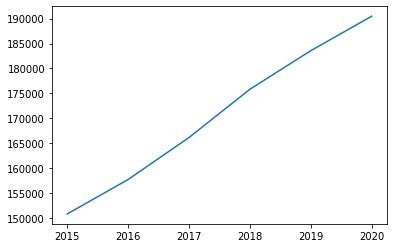

In [20]:
#create a line chart of the mean of the housing mean
# x-axis = RE_groupby_year.index.values, y-axis = RE_groupby_year["mean"] 
# the index values are the years, 2015, 2016 , etc. 
plt.plot(RE_groupby_year.index.values, RE_groupby_year["mean"])
plt.show()

# positive relationship

In [21]:
# by state
RE_groupby_state = no_duplicate_RE_df.groupby(["State Name", "Year"]).describe()["Housing Price"]
RE_groupby_state

count           mean            std       min        25%  \
State Name Year                                                             
AK         2015   48.0  286494.270833   48992.882898  212331.0  261588.25   
           2016   48.0  293213.000000   50158.105966  221318.0  269936.75   
           2017   48.0  298904.937500   49144.760715  228078.0  276244.25   
           2018   48.0  303328.250000   50980.503062  235489.0  279821.75   
           2019   48.0  312966.062500   55535.895347  234930.0  283656.50   
...                ...            ...            ...       ...        ...   
WY         2016  108.0  251895.648148   89137.436710  183403.0  209137.00   
           2017  108.0  254714.018519   94087.942945  185197.0  199239.50   
           2018  108.0  265593.601852  104230.702178  189912.0  200341.75   
           2019  108.0  279593.074074  115215.247001  192164.0  213058.25   
           2020   90.0  290474.455556  120936.245411  201030.0  223623.25   

                      50%        75%       max  
State Name Year                                 
AK         2015  287364.0  310970.00  359709.0  
           2016  293447.0  316955.00  365086.0  
           2017  294953.5  317160.50  376272.0  
           2018  298080.5  320953.75  384139.0  
           2019  309350.0  338930.50  398425.0  
...                   ...        ...       ...  
WY         2016  218524.0  245648.75  500246.0  
           2017  220102.0  254394.25  519805.0  
           2018  229006.5  268738.25  563953.0  
           2019  241571.5  283716.50  610445.0  
           2020  250856.5  291983.25  622816.0  

[306 rows x 8 columns]

In [22]:
# mean price of the city based on state
RE_groupby_city = no_duplicate_RE_df.groupby(["State Name", "City Name"]).mean()["Housing Price"]
RE_groupby_city

RE_groupby_city2 = no_duplicate_RE_df.groupby(["State Name", "City Name"]).median()["Housing Price"]
RE_groupby_city2

State Name  City Name   
AK          Anchorage       300276.0
            Fairbanks       234713.0
            Juneau          375957.5
            Ketchikan       291843.5
AL          Albertville     116149.5
                              ...   
WY          Jackson         518001.0
            Laramie         223217.5
            Riverton        194839.0
            Rock Springs    212734.5
            Sheridan        250796.5
Name: Housing Price, Length: 913, dtype: float64

In [23]:
# reset_index(), switch the year as index from previously to become a column again
RE_groupby_city = RE_groupby_city.reset_index()
RE_groupby_city

# sorting the value of the city based on housing price

RE_groupby_city = RE_groupby_city.sort_values("Housing Price")

# we are using the first value of each state based on the lowest price of the house
RE_groupby_city_cheap = RE_groupby_city.groupby("State Name").first()
RE_groupby_city_cheap.head()

,City Name,Housing Price
State Name,,
AK,Fairbanks,231209.471429
AL,Selma,52230.042857
AR,Blytheville,26219.400000
AZ,Sierra Vista,142703.910448
CA,El Centro,158358.657143


In [24]:
# extract the most expensive price of the house based on states
RE_groupby_city_max = RE_groupby_city.groupby("State Name").last()
# RE_groupby_city_max.head()


# expand the width of the column 
RE_groupby_city_max = RE_groupby_city_max.style.set_properties(subset=['Housing Price'], **{'width-min': '300px'})
RE_groupby_city_max

,City Name,Housing Price
State Name,,
AK,Juneau,376262.057143
AL,Daphne,192496.871429
AR,Fayetteville,177229.171429
AZ,Flagstaff,329980.542857
CA,San Jose,1039573.800000
CO,Breckenridge,541653.000000
CT,Stamford,420565.385714
DC,Washington,409039.657143
DE,Salisbury,249261.542857
